In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
# from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
# sklearnデータセットに収録されたiris(アヤメ)のデータセットをロード
from sklearn.datasets import load_iris
iris_data = load_iris()

# 学習用データのデータフレームを作成 (targetが1か2のデータである先頭100件を抽出)
x = pd.DataFrame(iris_data["data"],columns=iris_data["feature_names"])[50:150]
y = pd.DataFrame(iris_data["target"],columns=["target"])[50:150] # species 1 2 を抽出

# データフレームの情報を表示
print('feature shape:', x.shape) # 説明変数の形状
print('feature names:', iris_data["feature_names"]) # 説明変数の列名
print('target shape:', y.shape, y['target'].unique()) # 正解ラベルの形状とクラス名一覧

feature shape: (100, 4)
feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target shape: (100, 1) [1 2]


75 25 75 25


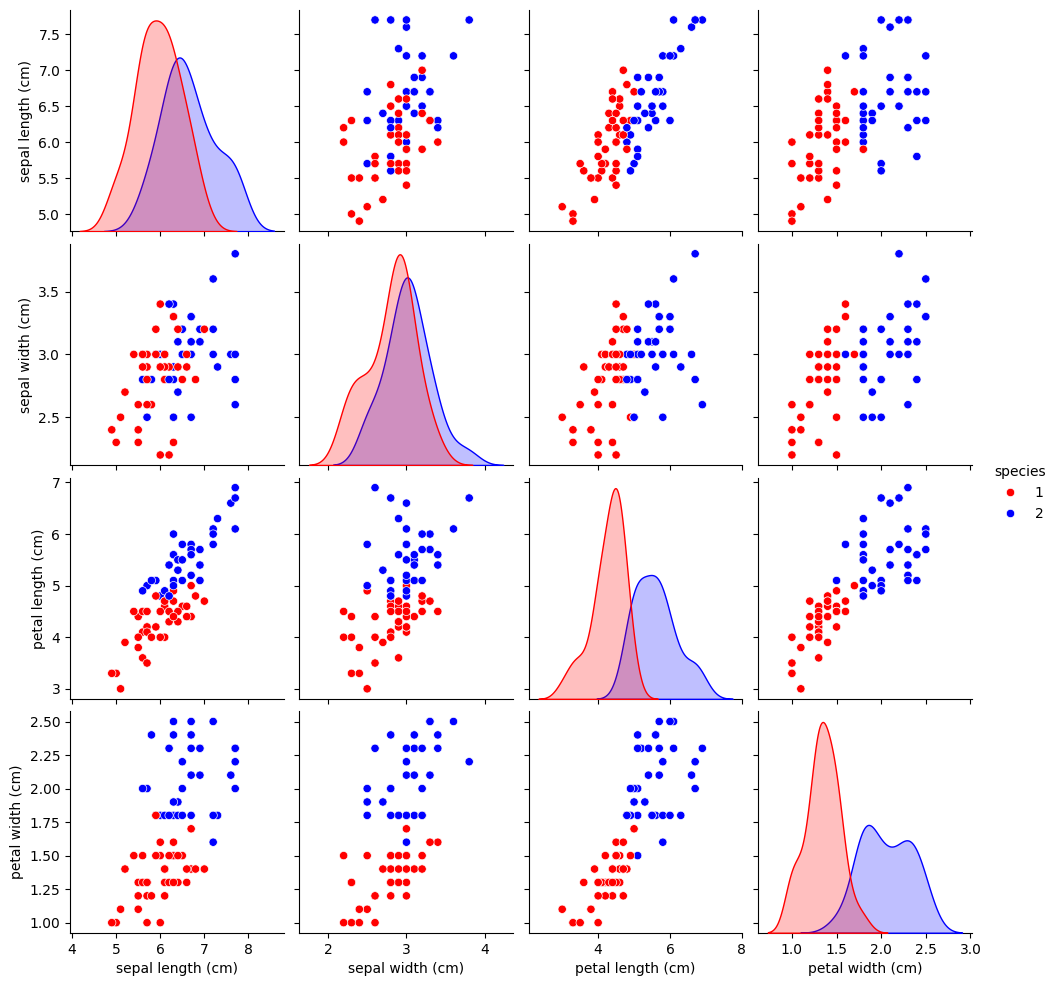

In [3]:
# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1) # 検証用データに25%を割当て
print(len(x_train), len(x_test), len(y_train), len(y_test)) # それぞれのデータ数を確認

# ペアプロットを表示
_plot = x_train.copy()  # 学習データをペアプロット用にコピー
_plot['species'] = y_train  # コピーした学習データに正解ラベルの列を追加
sns.pairplot(_plot, hue='species', # 品種(species)で色分け
                    palette={1: 'red', 2: 'blue'},   # 各クラスの色を指定
                    height=2.5)  # ペアプロットの各グラフの高さを指定 (全体ではない)
plt.show()

In [4]:
# k近傍法のモデルを学習データを利用して学習
clf_3 = KNeighborsClassifier(n_neighbors=3, # k を指定 (デフォルトは 5)
                             weights='uniform',  # 距離を考慮しない(uniform:デフォルト)、する(distance)
                             algorithm='auto', # 近傍点計算アルゴリズム (auto:デフォルト,ball_tree,kd_tree,brute)
                             leaf_size=30,  # ball_tree,kd_tree指定時のリーフサイズの設定 (デフォルトは 30)
                             p=2)  # 距離計算の次元 (2:デフォルト、1)
clf_3 = clf_3.fit(x_train, y_train['target'])  # * y_trainの列指定はwarning回避のため *

# 学習したモデルの性能(正答率)を学習用データで評価
predict_3_train = clf_3.predict(x_train)
print('knn (k=3, train data) : accuracy_score', metrics.accuracy_score(y_train, predict_3_train))

# 学習したモデルの性能(正答率)を検証用データで評価
predict_3_test = clf_3.predict(x_test)
print('knn (k=3, test data) : accuracy_score', metrics.accuracy_score(y_test, predict_3_test))

knn (k=3, train data) : accuracy_score 0.9733333333333334
knn (k=3, test data) : accuracy_score 0.88


75 25 75 25
(75, 4) (75, 1)
k=1 (train) 正解率 1.0 (test) 正解率 0.88
k=2 (train) 正解率 0.9733333333333334 (test) 正解率 0.88
k=3 (train) 正解率 0.9733333333333334 (test) 正解率 0.88
k=4 (train) 正解率 0.9733333333333334 (test) 正解率 0.88
k=5 (train) 正解率 0.9733333333333334 (test) 正解率 0.92
k=6 (train) 正解率 1.0 (test) 正解率 0.88
k=7 (train) 正解率 0.9733333333333334 (test) 正解率 0.92
k=8 (train) 正解率 0.9866666666666667 (test) 正解率 0.88
k=9 (train) 正解率 0.9733333333333334 (test) 正解率 0.88
k=10 (train) 正解率 0.9733333333333334 (test) 正解率 0.88
k=11 (train) 正解率 0.9866666666666667 (test) 正解率 0.88
k=12 (train) 正解率 0.9733333333333334 (test) 正解率 0.88
k=13 (train) 正解率 0.96 (test) 正解率 0.88
k=14 (train) 正解率 0.96 (test) 正解率 0.88
k=15 (train) 正解率 0.96 (test) 正解率 0.92


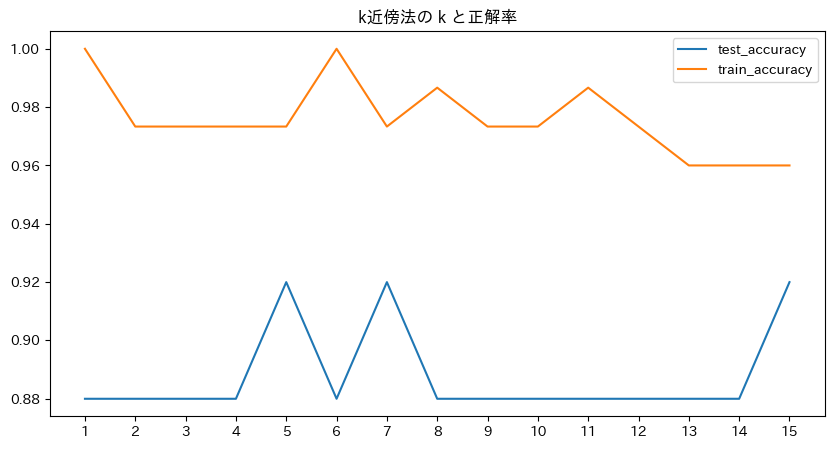

In [6]:
import statistics
import japanize_matplotlib

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
i = 0
k = []
test_accuracy = []
train_accuracy = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print(len(x_train), len(x_test), len(y_train), len(y_test))
print(x_train.shape, y_train.shape)

for _k in range(1, 16):
    # k近傍法で学習データを学習 (kは1-15まで設定)
    clf = KNeighborsClassifier(n_neighbors=_k, weights='uniform', algorithm='auto', p=2)
    clf = clf.fit(x_train, y_train['target'])  # * y_trainの列指定はwarning回避のため *

    # 学習用データに対する正解率を計算
    predict_train = clf.predict(x_train)
    _train_accuracy = metrics.accuracy_score(y_train, predict_train)
    
    # 検証用データに対する正解率を計算
    predict_test = clf.predict(x_test)
    _test_accuracy = metrics.accuracy_score(y_test, predict_test)

    # 学習用データと検証用データにおける正解率を表示
    print(f'k={_k}', '(train) 正解率', _train_accuracy, '(test) 正解率', _test_accuracy)

    # kを変えた場合の学習用データと検証用データの正解率グラフのデータを準備
    k.append(_k)
    train_accuracy.append(_train_accuracy)
    test_accuracy.append(_test_accuracy)


# 各決定係数をヒストグラムに表示 (ビンの幅・数を揃えて、透過色で重ね合わせて表示)
ax.set_title(f'k近傍法の k と正解率')
ax.plot(k, test_accuracy, label='test_accuracy')
ax.plot(k, train_accuracy, label='train_accuracy')
ax.set_xticks(np.arange(1, 16, step=1))
ax.legend()  # loc='upper left'

plt.show()

## 改良モデルの提案
### 勾配ブースティング



 Test accuracy	: 0.88
 Train accuracy	: 1.0




c:\Users\human\OneDrive - 埼玉大学\学部4年\04_後期授業\機械学習特論\python\env\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\human\OneDrive - 埼玉大学\学部4年\04_後期授業\機械学習特論\python\env\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


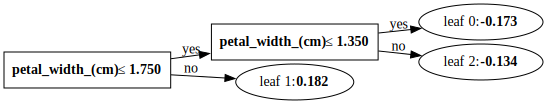

In [103]:
import lightgbm as lgb

lgb_train = lgb.Dataset(x_train, y_train.values-1)
# lgb_val = lgb.Dataset(x_val_lgb, y_val_lgb)
# lgb.test = lgb.Dataset(x_test, y_test)

# params = {
#     "objective": "binary",
#     "metrics": "binary_entropy",
#     # "metrics": "cross-entropy",
#     # "verbosity": -1
#     # "seed": 42
# }

# # gbm = lgb.train(params, train_set=lgb_train, min_data_in_)
gbm = lgb.LGBMClassifier(
    metrics="binary_logloss", 
    objective="binary",
    verbosity=-1,
    min_data_in_bin=1
)

# test_predict = gbm.predict(x_test)

gbm.fit(x_train, y_train)
test_predict = gbm.predict(x_test)

print("\n", "="*30, "\n")
print(" Test accuracy\t:", metrics.accuracy_score(y_test.values, test_predict))
print(" Train accuracy\t:", metrics.accuracy_score(y_train.values, gbm.predict(x_train)))
print("\n", "="*30, "\n")
# test_predict
lgb.create_tree_digraph(gbm, 1)

In [104]:
metrics.accuracy_score(y_train, gbm.predict(x_train))

1.0